# Uebung 1

We will try to do some non linear regression on some electrolyte data. For this we will generate some data with different noise levels and see how good or bad our model performs

In [41]:
#first we define the fancy model instead of taking the data
#in a normal experiment youd have the actually measured data and not the model
#but here we pretend this is a measurement

def fakeMeasureConductivity(rLiPF6,rPC):
    #this is at -30C
    #this model takes the ratio of LiPF6 and Propylene Carbonate (PC)
    #LiPF6 values >0-1.5
    #PC values 0-1
    c0,c1,c2,c3,c4,c5,c6,c7,c8,c9 = 1,-0.3,5.6,0.9,-2.3,-9.7,-0.6,1.4,0.6,4.0
    conductivity = c0+c1*rPC+c2*rLiPF6+c3*rPC**2+c4*rPC*rLiPF6+c5*rLiPF6**2+c6*rPC**3+c7*rPC**2*rLiPF6+c8*rPC*rLiPF6**2+c9*rLiPF6**3
    return conductivity

In [42]:
#now we need some imported libariries

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Plotting
Let's visualize things first

In [62]:
rPC, rLiPF6 = np.linspace(0,1,51),np.linspace(0.01,1.5,50)

In [63]:
#discuss what this is doing!
gridPC,gridLiPF6 = np.meshgrid(rPC,rLiPF6)
gridPC,gridLiPF6 = gridPC.flatten(),gridLiPF6.flatten()

In [64]:
condData = fakeMeasureConductivity(gridPC,gridLiPF6)

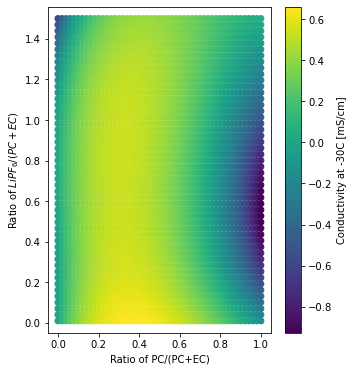

In [69]:
#plot it
plt.figure(figsize=(5,6))
plt.scatter(gridPC,gridLiPF6,c=np.log(condData))
plt.xlabel("Ratio of PC/(PC+EC)")
plt.ylabel("Ratio of $LiPF_6/(PC+EC)$")
plt.axis("equal")
plt.colorbar(label="Conductivity at -30C [mS/cm]")

# Task
Ok cool so let's assume we're tasked with finding a model for conductivity at 0.6 LiPF6 for any PC ratio

In [72]:
#first our data

n_samples = 50
rLiPF6 = 0.6

X = np.linspace(0,1,n_samples) #the PC ratios
y = fakeMeasureConductivity(rLiPF6,x)

Text(0, 0.5, 'Conductivity at -30C [mS/cm]')

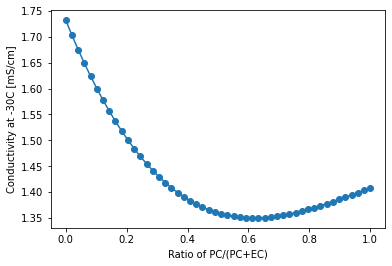

In [75]:
#plot it
plt.plot(X,y,'-o')
plt.xlabel("Ratio of PC/(PC+EC)")
plt.ylabel("Conductivity at -30C [mS/cm]")

ok looks like we could potentially fit a polynome of second degree to this
i.e. $a*(x-b)^2$

In [150]:
def myModel(params,X=X):
    return params[0]*(X-params[1])**2+params[2]

def errorfun(y,y_hat):
    #this calculates the mean square error
    return np.mean((y-y_hat)**2)

def objective(params,X=X,y=y):
    y_hat = myModel(params,X=X)
    #you can only return a scalar value. What we want to minimize is the fitting error
    error = errorfun(y,y_hat)
    return error


initial_guess = np.array([1,0.6,1.35])
res = minimize(objective, initial_guess, method='Nelder-Mead', tol=1e-9,bounds = ((0,2),(0,2),(0,3)))


In [151]:
print(res)

 final_simplex: (array([[0.84      , 0.6592997 , 1.33868383],
       [0.84      , 0.6592997 , 1.33868383],
       [0.84      , 0.6592997 , 1.33868383],
       [0.84      , 0.6592997 , 1.33868383]]), array([0.00014433, 0.00014433, 0.00014433, 0.00014433]))
           fun: 0.0001443286515040067
       message: 'Optimization terminated successfully.'
          nfev: 221
           nit: 117
        status: 0
       success: True
             x: array([0.84      , 0.6592997 , 1.33868383])


Text(0, 0.5, 'Conductivity at -30C [mS/cm]')

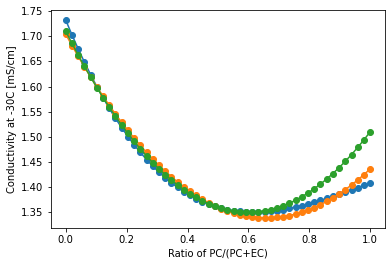

In [152]:
#let's plot this
y_hat = myModel(params=res.x,X=X)
y_guess = myModel(params=initial_guess,X=X)

plt.plot(X,y,'-o',label="Measurement")
plt.plot(X,y_hat,'-o',label="Prediction")
plt.plot(X,y_guess,'-o',label="Guess")

plt.xlabel("Ratio of PC/(PC+EC)")
plt.ylabel("Conductivity at -30C [mS/cm]")

... a pretty good fit

In [153]:
error(y,y_hat)

0.0001443286515040067

In [154]:
error(y,y_guess)

0.0008874314959872013

# Task 0
What is the R2 of this?
Remember $R^2 = 1 - \sum((y-y_{hat})^2)/\sum((y-y_{mean})^2$

In [ ]:
r2 =

# Task 1:
Try running this with the BFGS minimizer by changin the code below

In [161]:
def myModel(params,X=X):
    return params[0]*(X-params[1])**2+params[2]

def errorfun(y,y_hat):
    #this calculates the mean square error
    return np.mean((y-y_hat)**2)

def objective(params,X=X,y=y):
    y_hat = myModel(params,X=X)
    #you can only return a scalar value. What we want to minimize is the fitting error
    error = errorfun(y,y_hat)
    return error


initial_guess = np.array([1,0.6,1.35])
res = minimize(objective, initial_guess, method='Nelder-Mead', tol=1e-9,bounds = ((0,2),(0,2),(0,3)))


Text(0, 0.5, 'Conductivity at -30C [mS/cm]')

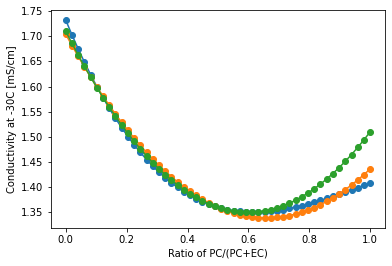

In [160]:
#let's plot this
y_hat = myModel(params=res.x,X=X)
y_guess = myModel(params=initial_guess,X=X)

plt.plot(X,y,'-o',label="Measurement")
plt.plot(X,y_hat,'-o',label="Prediction")
plt.plot(X,y_guess,'-o',label="Guess")

plt.xlabel("Ratio of PC/(PC+EC)")
plt.ylabel("Conductivity at -30C [mS/cm]")

how does error(y,y_hat) improve?

# Task 2

Do the same model run but with a MAE!

In [170]:
def myModel(params,X=X):
    return params[0]*(X-params[1])**2+params[2]

def errorfun(y,y_hat):
    #this calculates the mean square error
    return np.mean((y-y_hat)**2)

def objective(params,X=X,y=y):
    y_hat = myModel(params,X=X)
    #you can only return a scalar value. What we want to minimize is the fitting error
    error = errorfun(y,y_hat)
    return error


initial_guess = np.array([1,0.6,1.35])
res = minimize(objective, initial_guess, method='BFGS', tol=1e-6,bounds = ((0,2),(0,2),(0,3)))


/Users/helgesorenstein/opt/anaconda3/envs/dev/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


In [169]:
res

      fun: 0.009933436181646637
 hess_inv: array([[ 0.19523673, -0.14446848, -0.0389104 ],
       [-0.14446848,  0.11836474,  0.02960226],
       [-0.0389104 ,  0.02960226,  0.00923175]])
      jac: array([-0.00332601,  0.00956004, -0.00613908])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 308
      nit: 13
     njev: 74
   status: 2
  success: False
        x: array([0.83614883, 0.64982673, 1.34171263])

# Task 3

Can you program a loss that yields the maximum R2?

# Task 4

Let's try ridge regression. The main goal of this is to show you the (pretty much standard) scikit learn interface

In [180]:
from sklearn.linear_model import Ridge, Lasso
clfr = Ridge(alpha=1.0)
clfl = Lasso(alpha=1.0)

_ = clfr.fit(X.reshape(-1,1), y)
_ = clfl.fit(X.reshape(-1,1), y)

In [181]:
y_hat_ridge = clfr.predict(X.reshape(-1,1))
y_hat_lasso = clfl.predict(X.reshape(-1,1))

Text(0, 0.5, 'Conductivity at -30C [mS/cm]')

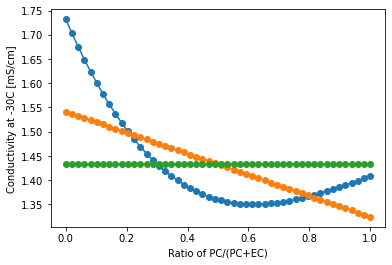

In [183]:
plt.plot(X,y,'-o',label="Measurement")
plt.plot(X,y_hat_ridge,'-o',label="Ridge")
plt.plot(X,y_hat_lasso,'-o',label="Lasso")

plt.xlabel("Ratio of PC/(PC+EC)")
plt.ylabel("Conductivity at -30C [mS/cm]")

In [199]:
#we can also just use the polynomial regressor
from sklearn.preprocessing import PolynomialFeatures
#and feed these parameters in a lasso regression
from sklearn.pipeline import make_pipeline
alpha = 0.001
pipeline = make_pipeline(PolynomialFeatures(7), Lasso(alpha=alpha))

In [200]:
pipeline.fit(X.reshape(-1,1),y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('lasso', Lasso(alpha=0.001))])

In [201]:
y_hat_pipe = pipeline.predict(X.reshape(-1,1))

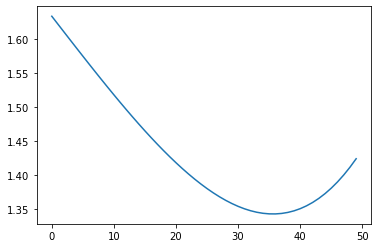

In [202]:
plt.plot(y_hat_pipe)

# Extra: See Regularization in action

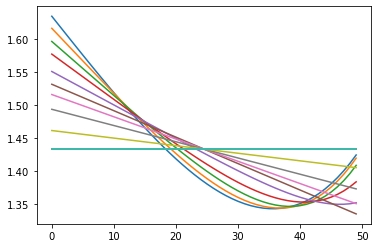

In [208]:
for alpha in np.geomspace(1e-3,1,20):
    pipeline = make_pipeline(PolynomialFeatures(7), Lasso(alpha=alpha))
    pipeline.fit(X.reshape(-1,1),y)
    y_hat_pipe = pipeline.predict(X.reshape(-1,1))
    plt.plot(y_hat_pipe)

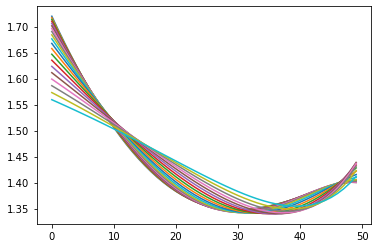

In [209]:
for alpha in np.geomspace(1e-3,1,20):
    pipeline = make_pipeline(PolynomialFeatures(7), Ridge(alpha=alpha))
    pipeline.fit(X.reshape(-1,1),y)
    y_hat_pipe = pipeline.predict(X.reshape(-1,1))
    plt.plot(y_hat_pipe)